<a href="https://colab.research.google.com/github/Srishti262/Automated-Exchange-Rate-Tracker-with-Alerts-using-Google-Sheets/blob/main/ETL_Pipeline_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
from datetime import datetime


In [3]:
url = "https://api.exchangerate-api.com/v4/latest/USD"
response = requests.get(url)
data = response.json()



In [4]:
rates = data['rates']
selected_currencies = ['EUR', 'INR', 'GBP', 'JPY']

df = pd.DataFrame({
    'timestamp': [datetime.now()] * len(selected_currencies),
    'currency': selected_currencies,
    'rate': [rates[c] for c in selected_currencies]
})

df.head()


,timestamp,currency,rate
0,2025-03-24 17:27:13.229325,EUR,0.924
1,2025-03-24 17:27:13.229325,INR,86.100
2,2025-03-24 17:27:13.229325,GBP,0.774
3,2025-03-24 17:27:13.229325,JPY,149.340


In [5]:
!pip install --upgrade gspread
!pip install gspread_dataframe


In [8]:
import gspread
from google.auth.transport.requests import Request
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.exceptions import RefreshError
from gspread_dataframe import set_with_dataframe
import pandas as pd
from datetime import datetime


In [9]:
import requests
import pandas as pd
from datetime import datetime

# Extract from public API
url = "https://api.exchangerate-api.com/v4/latest/USD"
response = requests.get(url)
data = response.json()

# Transform to DataFrame
selected = ['INR', 'EUR', 'JPY', 'GBP']
df = pd.DataFrame({
    "timestamp": [datetime.now()] * len(selected),
    "currency": selected,
    "rate": [data['rates'][c] for c in selected]
})

# Save to CSV
df.to_csv("exchange_rates.csv", index=False)

# Download CSV in Colab
from google.colab import files
files.download("exchange_rates.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import os

csv_file = "exchange_rates.csv"

# Check if the CSV already exists
if os.path.exists(csv_file):
    # Load existing
    existing_df = pd.read_csv(csv_file)
    # Append new
    combined_df = pd.concat([existing_df, df], ignore_index=True)
else:
    combined_df = df

# Save combined version
combined_df.to_csv(csv_file, index=False)
print("Data appended to CSV successfully.")

# Optional: preview
combined_df.tail()


Data appended to CSV successfully.


,timestamp,currency,rate
3,2025-03-24 17:32:46.855722,GBP,0.774
4,2025-03-24 17:32:46.855722,INR,86.100
5,2025-03-24 17:32:46.855722,EUR,0.924
6,2025-03-24 17:32:46.855722,JPY,149.340
7,2025-03-24 17:32:46.855722,GBP,0.774


In [11]:
from google.colab import files
files.download("exchange_rates.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

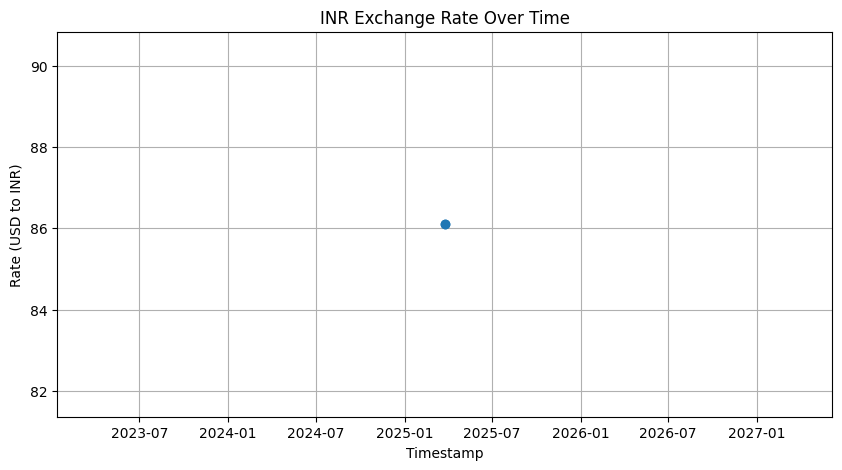

In [12]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime (if needed)
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Plot INR rate over time
inr_data = combined_df[combined_df['currency'] == 'INR']

plt.figure(figsize=(10, 5))
plt.plot(inr_data['timestamp'], inr_data['rate'], marker='o')
plt.title("INR Exchange Rate Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Rate (USD to INR)")
plt.grid(True)
plt.show()


In [14]:
# Filter INR
inr_rate = df[df['currency'] == 'INR']['rate'].values[0]

if inr_rate > 85:
    print(f"⚠️ ALERT: INR rate is high - {inr_rate}")
    # send_alert(inr_rate)  # implement this


⚠️ ALERT: INR rate is high - 86.1
